In [25]:
import pandas as pd
import numpy as np



In [30]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance


#Program overview
This program predict the number of students that will be in AUT-052-5006 based on the number of students in AUT classes from the previous semester. AUT-052 was just a random class for auto majors in the 2nd semester. 
There is still a lot of automation to be done as this program moves to predicting all of the class in the 2nd semester instead of just one.

#Conclusion: The PolynomialFeatures, LinearRegression, Pipeline using permutation importance can acuratly predict the students in AUT-052 based on the prevois semester students. It will be of great interest to see if this model can accurately predict the remain 2nd semester classes as well. 

In [3]:
# read each sheet of the excel file
FA2017 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2017FA')
SP2017 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2017SP')
FA2018 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2018FA')
SP2018 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2018SP')
FA2019 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2019FA')
SP2019 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2019SP')
FA2020 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2020FA')
SP2020 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2020SP')
FA2021 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2021FA')
SP2021 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2021SP')
FA2022 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2021FA')
SP2022 = pd.read_excel('Data/Technology Student Counts.xlsx', sheet_name ='2021SP')


In [4]:
#Lots of space padded data. Sometimes before, sometimes after.
#Get rid of EXCO, EXCL, and stdcnt blank data rows 

values = ['EXCO        ', 'EXCL        ', '       ']
FA2017 = FA2017[FA2017['Location    '].isin(values) == False]
FA2017 = FA2017[FA2017['  StdCnt'].isin(values) == False]
FA2018 = FA2018[FA2018['Location    '].isin(values) == False]
FA2018 = FA2018[FA2018['  StdCnt'].isin(values) == False]
FA2019 = FA2019[FA2019['Location    '].isin(values) == False]
FA2019 = FA2019[FA2019['  StdCnt'].isin(values) == False]
FA2020 = FA2020[FA2020['Location    '].isin(values) == False]
FA2020 = FA2020[FA2020['  StdCnt'].isin(values) == False]
FA2021 = FA2021[FA2021['Location    '].isin(values) == False]
FA2021 = FA2021[FA2021['  StdCnt'].isin(values) == False]
FA2022 = FA2021[FA2022['Location    '].isin(values) == False]
FA2022 = FA2021[FA2022['  StdCnt'].isin(values) == False]

In [5]:

SP2017 = SP2017[SP2017['Location    '].isin(values) == False]
SP2017 = SP2017[SP2017['  StdCnt'].isin(values) == False]
SP2018 = SP2018[SP2018['Location    '].isin(values) == False]
SP2018 = SP2018[SP2018['  StdCnt'].isin(values) == False]
SP2019 = SP2019[SP2019['Location    '].isin(values) == False]
SP2019 = SP2019[SP2019['  StdCnt'].isin(values) == False]
SP2020 = SP2020[SP2020['Location    '].isin(values) == False]
SP2020 = SP2020[SP2020['  StdCnt'].isin(values) == False]
SP2021 = SP2021[SP2021['Location    '].isin(values) == False]
SP2021 = SP2021[SP2021['  StdCnt'].isin(values) == False]
SP2022 = SP2021[SP2022['Location    '].isin(values) == False]
SP2022 = SP2021[SP2022['  StdCnt'].isin(values) == False]


In [6]:
#Keep only the columns I need and reindex: d=drop 
FA2017d = FA2017.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
SP2017d = SP2017.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
FA2018d = FA2018.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
SP2018d = SP2018.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
FA2019d = FA2019.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
SP2019d = SP2019.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
FA2020d = FA2020.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
SP2020d = SP2020.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
FA2021d = FA2021.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
SP2021d = SP2021.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
FA2022d = FA2021.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')
SP2022d = SP2021.drop(['Location    ', 'CrseTypes   ','Depts ', '  Capacity'], axis=1).set_index('Section Name')


In [7]:
#convert stdcnt to integer 
#had to convert to string first (I forgot why) and then to int.
FA2017d = FA2017d['  StdCnt'].astype(str).astype(int)
SP2017d = SP2017d['  StdCnt'].astype(str).astype(int)
FA2018d = FA2018d['  StdCnt'].astype(str).astype(int)
SP2018d = SP2018d['  StdCnt'].astype(str).astype(int)
FA2019d = FA2019d['  StdCnt'].astype(str).astype(int)
SP2019d = SP2019d['  StdCnt'].astype(str).astype(int)
FA2020d = FA2020d['  StdCnt'].astype(str).astype(int)
SP2020d = SP2020d['  StdCnt'].astype(str).astype(int)
FA2021d = FA2021d['  StdCnt'].astype(str).astype(int)
SP2021d = SP2021d['  StdCnt'].astype(str).astype(int)
FA2022d = FA2022d['  StdCnt'].astype(str).astype(int)
SP2022d = SP2022d['  StdCnt'].astype(str).astype(int)



In [8]:
#Create dataframes for the transpose
FA2017d = pd.DataFrame(FA2017d)
SP2017d = pd.DataFrame(SP2017d)
FA2018d = pd.DataFrame(FA2018d)
SP2018d = pd.DataFrame(SP2018d)
FA2019d = pd.DataFrame(FA2019d)
FA2019d = pd.DataFrame(FA2019d)
FA2020d = pd.DataFrame(FA2020d)
SP2020d = pd.DataFrame(SP2020d)
FA2021d = pd.DataFrame(FA2021d)
SP2021d = pd.DataFrame(SP2021d)
FA2022d = pd.DataFrame(FA2022d)
SP2022d = pd.DataFrame(SP2022d)

In [9]:
#transpose rows to columns:t=transpose
dt2017 = FA2017d.T
SP2017dt = SP2017d.T
dt2018 = FA2018d.T
SP2018dt = SP2018d.T
dt2019 = FA2019d.T
SP2019dt = SP2019d.T
dt2020 = FA2020d.T
SP2020dt = SP2020d.T
dt2021 = FA2021d.T
SP2021dt = SP2021d.T
dt2022 = FA2022d.T
SP2022dt = SP2022d.T

In [10]:
#add 'y' column
dt2017['AUT-052-5006']=SP2018dt['AUT-052-5006']
dt2018['AUT-052-5006']=SP2019dt['AUT-052-5006']
dt2019['AUT-052-5006']=SP2020dt['AUT-052-5006']
dt2020['AUT-052-5006']=SP2021dt['AUT-052-5006']
dt2021['AUT-052-5006']=SP2022dt['AUT-052-5006']
#dt2022['AUT-052-5006']=SP2023dt['AUT-052-5006']

In [11]:
#combine datframes
old_courses = pd.concat([dt2017, dt2018, dt2019, dt2020, dt2021])
#old_courses['AUT-052-5006']

In [12]:
#Change NaN's (classes not offered) to zeros
old_courses = old_courses.fillna(0)
dt2021 = dt2021.fillna(0)
#print(old_courses['AUT-052-5006'])
#print(old_courses.info())

In [13]:
Auto_program_list=['AUT-048','APT-041','AUT-051','AUT-050','AUT-080','AUT-053','AUT-052','AUT-059','AUT-081','AUT-076','AUT-082','AUT-083']
test = old_courses.columns
new_list=[]
keep_list=Auto_program_list

for i in range(len(test)):
    k =test[i][0:7] # removes the section number
    drop=0
    for keep in (keep_list):
        if k == keep:
            drop = drop+1
    if drop == 0:   # If the class number doesn't == to a class on the list drop it.
        #print('dropping', test[i])
        old_courses.drop(test[i], axis =1, inplace = True)


In [14]:
old_courses

Section Name,AUT-048-44133,AUT-050-1866,AUT-050-1867,AUT-051-1869,AUT-051-43640,AUT-059-1873,AUT-080-13656,AUT-081-1878,AUT-052-5006,AUT-048-1865,AUT-080-46375,APT-041-51489,APT-041-51490,APT-041-51491,APT-041-52335,APT-041-52336,AUT-051-52059,AUT-059-52061,AUT-080-52026,AUT-081-52062
StdCnt,10,8,6.0,7.0,3.0,5.0,7.0,5.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
StdCnt,8,8,6.0,7.0,5.0,8.0,5.0,8.0,9,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
StdCnt,7,14,0.0,9.0,0.0,5.0,0.0,5.0,12,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
StdCnt,5,7,0.0,7.0,0.0,7.0,8.0,7.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
StdCnt,13,11,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0,14.0,16.0,8.0,9.0,8.0,12.0,5.0,11.0,5.0


In [159]:
model_stats = pd.DataFrame()
df1=pd.DataFrame()

In [203]:
#Create train and test datasets
X = old_courses.drop(['AUT-052-5006'],axis =1)
y = old_courses['AUT-052-5006']
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = .125)
#print(X.shape,y.shape )
#print(X_train.shape,y_train.shape )
#print(X_test )

In [204]:
# check for corrilations
corr=old_courses.corr()
(corr['AUT-052-5006']).sort_values(ascending=False)

Section Name
AUT-052-5006     1.000000e+00
AUT-080-46375    7.905694e-01
AUT-051-1869     6.804138e-01
AUT-050-1866     5.726941e-01
AUT-059-1873     2.294157e-01
AUT-081-1878     2.294157e-01
AUT-050-1867     2.151657e-01
AUT-051-43640    1.535738e-01
AUT-048-1865     4.681111e-17
AUT-048-44133   -1.932245e-01
AUT-080-13656   -2.785430e-01
APT-041-51489   -5.270463e-01
APT-041-51490   -5.270463e-01
APT-041-51491   -5.270463e-01
APT-041-52335   -5.270463e-01
APT-041-52336   -5.270463e-01
AUT-051-52059   -5.270463e-01
AUT-059-52061   -5.270463e-01
AUT-080-52026   -5.270463e-01
AUT-081-52062   -5.270463e-01
Name: AUT-052-5006, dtype: float64

In [205]:
lr = LinearRegression().fit(X_train, y_train)
train_mse = mean_squared_error(y_train, lr.predict(X_train))
test_mse = mean_squared_error(y_test, lr.predict(X_test)) 
print('train_mse=',train_mse)
print('test_mse=',test_mse)

print('Actual=', y_test[0], 'predicted =',lr.predict(X_test)[0])
df1['Model']=['Logistic Regression']
df1['Actual']= [y_test[0]]
df1['Predicted']= [lr.predict(X_test)[0]]

model_stats=model_stats.append(df1)

train_mse= 1.9721522630525295e-31
test_mse= 37.671103139490455
Actual= 7 predicted = 13.137678970057856


In [206]:
pipe = Pipeline([('features', PolynomialFeatures(degree = 3)), ('model', LinearRegression())])
pipe.fit(X, y)


r = permutation_importance(pipe, X, y, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<8}: "
              f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")



AUT-050-1866: 0.800 +/- 0.390


In [207]:
train_mse = mean_squared_error(y_train, pipe.predict(X_train))
test_mse = mean_squared_error(y_test, pipe.predict(X_test))         
print('train_mse=',train_mse)
print('test_mse=',test_mse)
print('Actual=', y_test[0], 'predicted =',pipe.predict(X_test)[0])

df1['Model']=['Pipeline']
df1['Actual']= [y_test[0]]
df1['Predicted']= [pipe.predict(X_test)[0]]

model_stats=model_stats.append(df1)

train_mse= 5.5220263365470826e-30
test_mse= 3.1554436208840472e-30
Actual= 7 predicted = 6.999999999999998


In [208]:
model_stats

,Model,Actual,Predicted
0,Logistic Regression,12,7.857548
0,Pipeline,12,12.000000
0,Logistic Regression,10,8.289688
0,Pipeline,10,10.000000
0,Logistic Regression,12,7.857548
0,Pipeline,12,12.000000
0,Logistic Regression,12,7.857548
0,Pipeline,12,12.000000
0,Logistic Regression,10,8.289688
0,Pipeline,10,10.000000


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

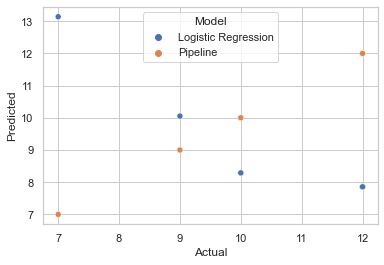

In [211]:
sns.set(style='whitegrid')
sns.scatterplot(x="Actual", y="Predicted",hue='Model', data=model_stats)